In [22]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
prediction = autoencoder.predict(x_test[:1])


Epoch 1/5
235/235 [==============================] - 2s 5ms/step - loss: 0.6945 - val_loss: 0.6944
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6941 - val_loss: 0.6941
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 5/5
1/1 [==============================] - 0s 44ms/step


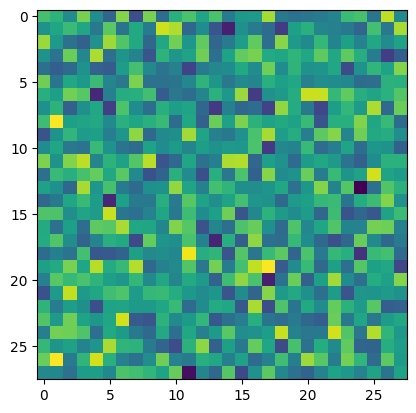

In [23]:
from matplotlib import pyplot as plt
plt.imshow(prediction.reshape(28,28))
plt.show()

In [20]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# adding hidden layer
hd1 = Dense(64,activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hd1)
# adding hidden layer at decoding side
hd2 = Dense(64,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hd2)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

prediction = autoencoder.predict(x_test[:1])



Epoch 1/5
235/235 [==============================] - 3s 7ms/step - loss: 0.6934 - val_loss: 0.6934
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6933 - val_loss: 0.6933
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 5/5
1/1 [==============================] - 0s 61ms/step


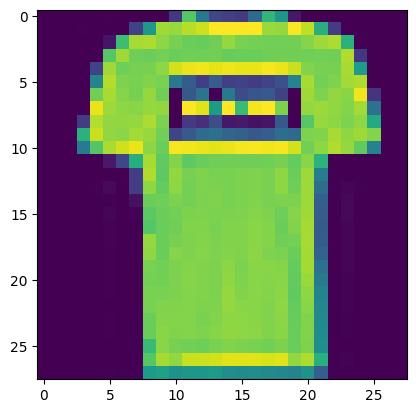

In [7]:
from matplotlib import pyplot as plt
plt.imshow(x_train[1].reshape(28,28))
plt.show()



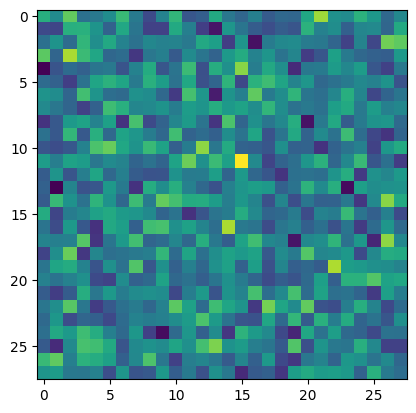

In [21]:
from matplotlib import pyplot as plt
plt.imshow(prediction.reshape(28,28))
plt.show()

In [12]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics =['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/10
235/235 [==============================] - 2s 7ms/step - loss: 0.6954 - accuracy: 0.0013 - val_loss: 0.6953 - val_accuracy: 0.0016
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6952 - accuracy: 0.0014 - val_loss: 0.6951 - val_accuracy: 0.0014
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6951 - accuracy: 0.0014 - val_loss: 0.6950 - val_accuracy: 0.0013
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6949 - accuracy: 0.0014 - val_loss: 0.6948 - val_accuracy: 0.0013
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6948 - accuracy: 0.0014 - val_loss: 0.6947 - val_accuracy: 0.0013
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6946 - accuracy: 0.0014 - val_loss: 0.6945 - val_accuracy: 0.0012
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6945 - accuracy: 0.0014 - val_loss: 0.6944 - val_accuracy: 0.0012
Epoch 

In [13]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# adding hidden layer
hd1 = Dense(64,activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hd1)
# adding hidden layer at decoding side
hd2 = Dense(64,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hd2)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

prediction = autoencoder.predict(x_test_noisy[:1])


Epoch 1/10
235/235 [==============================] - 3s 6ms/step - loss: 0.6953 - accuracy: 9.0000e-04 - val_loss: 0.6953 - val_accuracy: 0.0011
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6952 - accuracy: 9.3333e-04 - val_loss: 0.6951 - val_accuracy: 0.0011
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6950 - accuracy: 9.1667e-04 - val_loss: 0.6949 - val_accuracy: 0.0011
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6949 - accuracy: 9.6667e-04 - val_loss: 0.6948 - val_accuracy: 0.0011
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.6947 - accuracy: 9.6667e-04 - val_loss: 0.6946 - val_accuracy: 0.0011
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6946 - accuracy: 9.5000e-04 - val_loss: 0.6945 - val_accuracy: 0.0011
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6944 - accuracy: 9.8333e-04 - val_loss: 0.6944 -

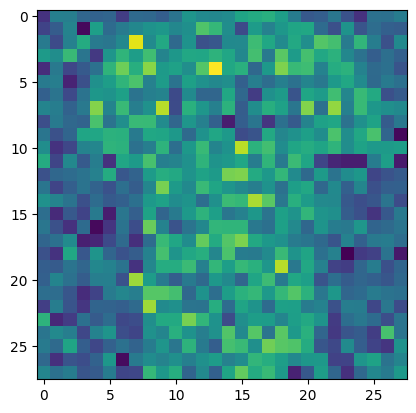

In [14]:
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[1].reshape(28,28))
plt.show()


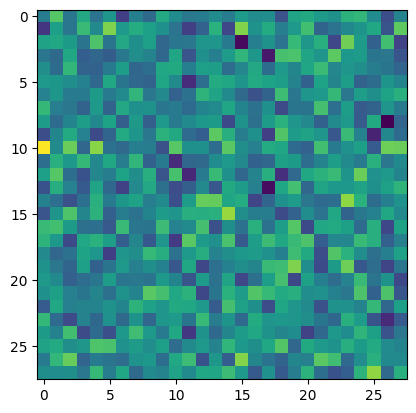

In [15]:
from matplotlib import pyplot as plt
plt.imshow(prediction.reshape(28,28))
plt.show()

Epoch 1/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6939 - accuracy: 0.0010 - val_loss: 0.6938 - val_accuracy: 0.0012
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6937 - accuracy: 0.0010 - val_loss: 0.6937 - val_accuracy: 0.0013
Epoch 3/10
235/235 [==============================] - 2s 7ms/step - loss: 0.6936 - accuracy: 0.0010 - val_loss: 0.6936 - val_accuracy: 0.0012
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6935 - accuracy: 0.0010 - val_loss: 0.6934 - val_accuracy: 0.0012
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6934 - accuracy: 0.0010 - val_loss: 0.6933 - val_accuracy: 0.0012
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6932 - accuracy: 0.0010 - val_loss: 0.6932 - val_accuracy: 0.0012
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6931 - accuracy: 0.0011 - val_loss: 0.6931 - val_accuracy: 0.0012
Epoch 

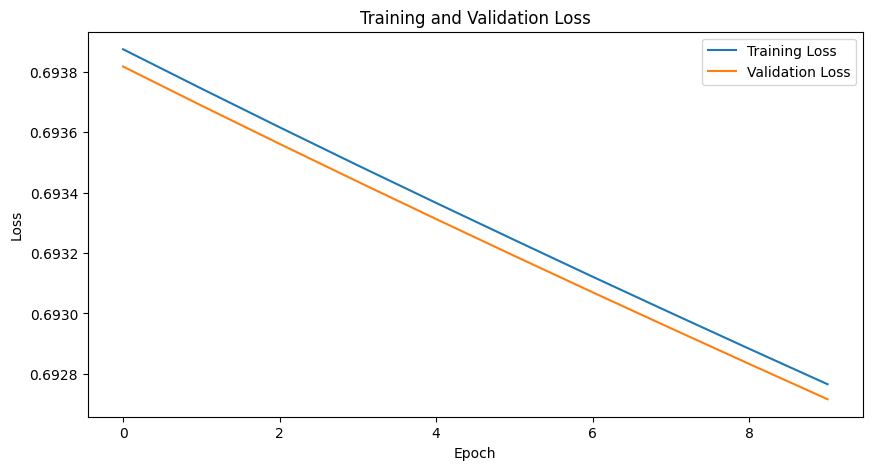

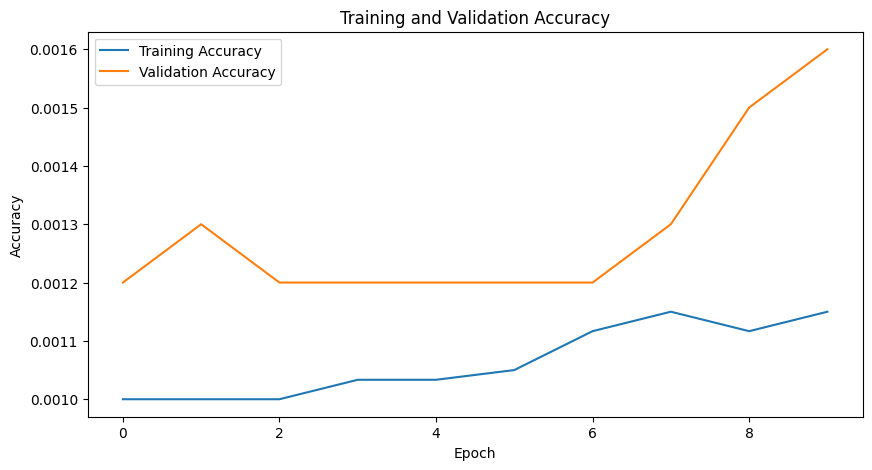

In [16]:
import matplotlib.pyplot as plt

# Train the autoencoder and get the training history
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test_noisy))

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy (if you want to monitor accuracy)
# Note: Autoencoders are not typically trained with accuracy, so this plot is optional.
#       You may remove this part if you only want to plot the loss.
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
